В ходе статистических исследований нам часто приходится рассчитывать средние, медианы, квартили, процентили. Этому посвящена теоретическая часть курса и, пожалуй, всё это ты уже умеешь делать. В конце концов гуглить-то ты точно умеешь 😉

Эта тетрадка поможет лучше разобраться в том как красиво нанести всю эту статистическую ~~околесицу~~ разметку на график. В библиотеке `seaborn` есть целый набор инструментов для визуализации распределения данных. В этом обзоре мы будем создавать  гистограмму на основе модельного датасета `titanic` из библиотеки `seaborn`..


Но прежде сделаем то, что мы обычно делаем в проектах.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.5, style="darkgrid")  # настройка темы сиборна, одна на все ячейки.

In [2]:
data = sns.load_dataset("titanic")
display(data.head())
display(data.describe())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Бытует мнение, что красота на графиках аналитику не нужна. Суровый аналитик делает так:

In [3]:
plt.hist(data['age']);

и тратит на это не больше пары секунд.  
Не могу не согласиться, тем более, что для визуализации данных во многих компаниях используются коммерческие решения вроде Tableau, например.  


Но если хочется, аккуратных и красивых графиков прямо сейчас, в тетрадке; графиков, которые не стыдно показать ревьюеру, работодателю или внукам в старости - одной строчки кода может быть мало.   

Итак, как бы мы нарисовали красивую полноразмерную гистограмму:

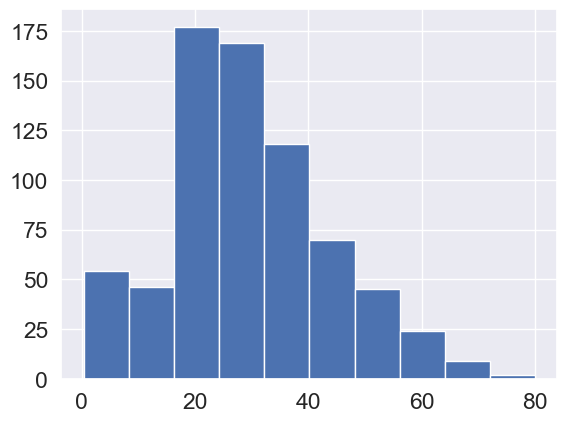

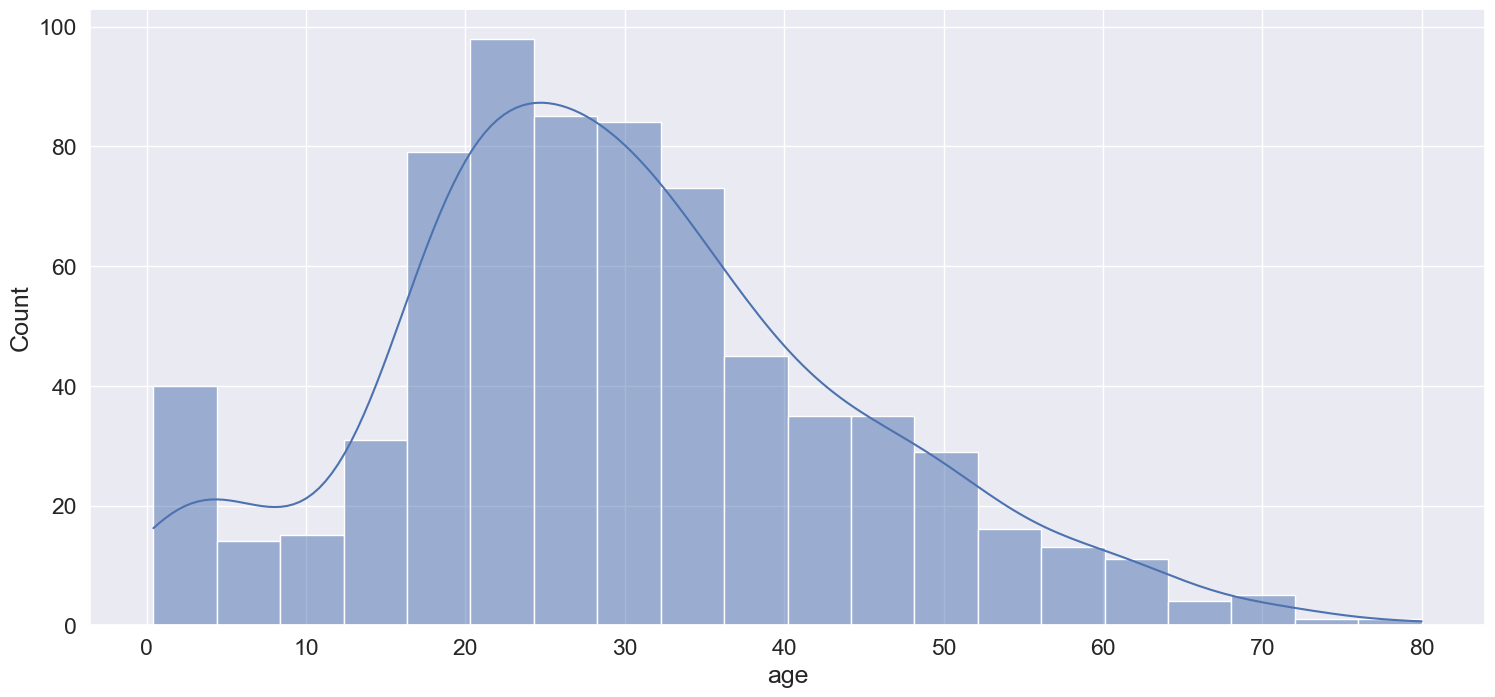

In [4]:
fig, ax = plt.subplots(figsize=(18, 8))  # раз: "заготовка" фигуры с размерами в дюймах
ax = sns.histplot(data, x='age', kde=True)  # два: гистограмма

plt.show()

Пока что мы только поменяли размер гистограммы и добавили кривую плотности распределения.   

Добавим среднее, медиану, первый и третий квартили (25 и 75 %%) и отложим по полтора межквартильных размаха - если бы это был боксплот, там были бы его усы :-{  

И если бы речь шла о каких-то равномерных значениях, можно было бы рассчитать их в цикле. Но тут, так как к каждой линии подход индивидуальный, придётся рассчитывать статистики по отдельности. 

In [5]:
mean = data.age.mean()
median = data.age.median()
quantile_1 = data.age.quantile(.25)
quantile_3 = data.age.quantile(.75)
iqr = quantile_3 - quantile_1
wisker_right = quantile_3 + iqr * 1.5
wisker_left = quantile_1 - iqr * 1.5

Нанесём их на график.

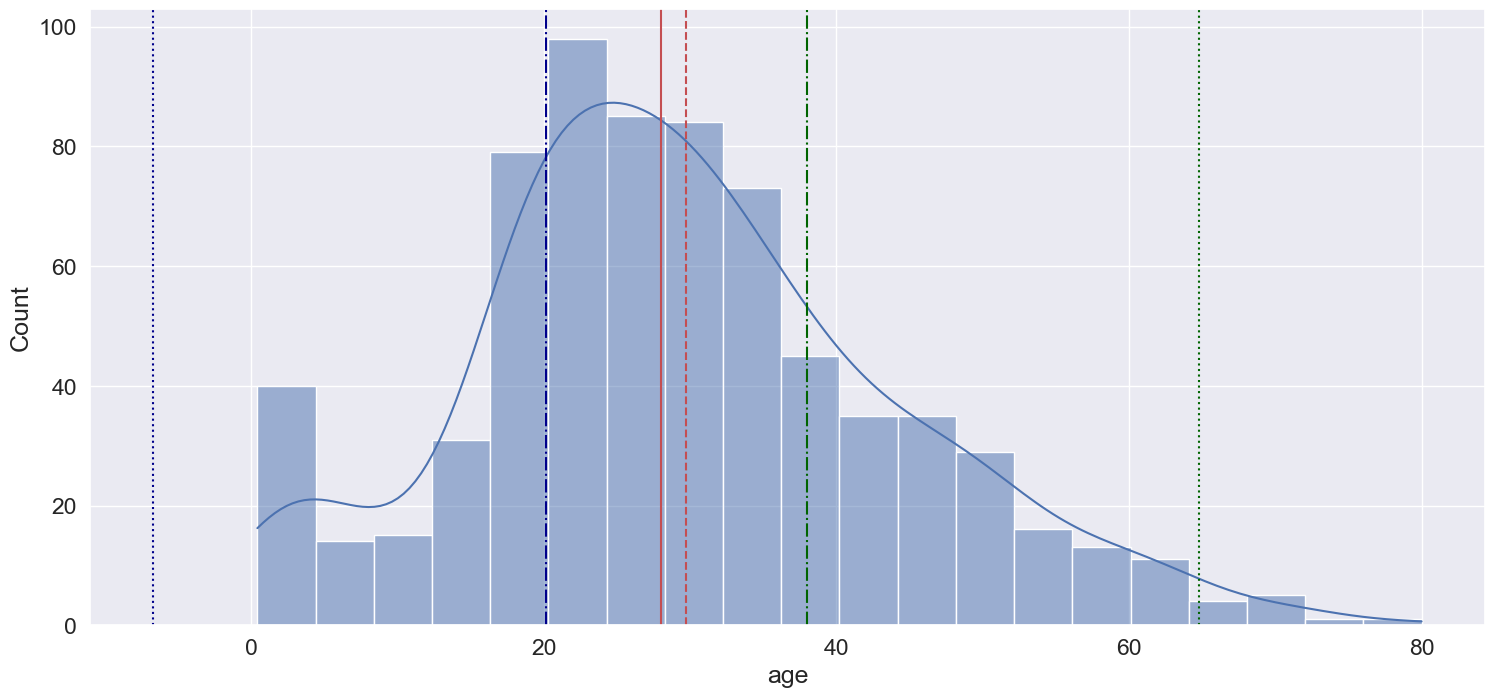

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.histplot(data, x='age', kde=True)

# каждый axvline рисует одну линию
# ls задаёт её стиль, а c - цвет
plt.axvline(mean, ls='--', c='r')
plt.axvline(median, c='r')
plt.axvline(quantile_1, ls='-.', c='darkblue')
plt.axvline(quantile_3, ls='-.', c='darkgreen')
plt.axvline(wisker_right, ls=':', c='darkgreen')
plt.axvline(wisker_left, ls=':', c='darkblue')

plt.show()

Народная примета: чем дальше среднее от медианы, тем больше выбросов.  

График всё ещё скудный, и непонятно, что за линии на нём. Добавим легенду, установим количество корзин на 80 (макимальный возраст пассажиров) и добавим боксплот, чтобы сравнить совпадают ли с ним линии на гистограмме.

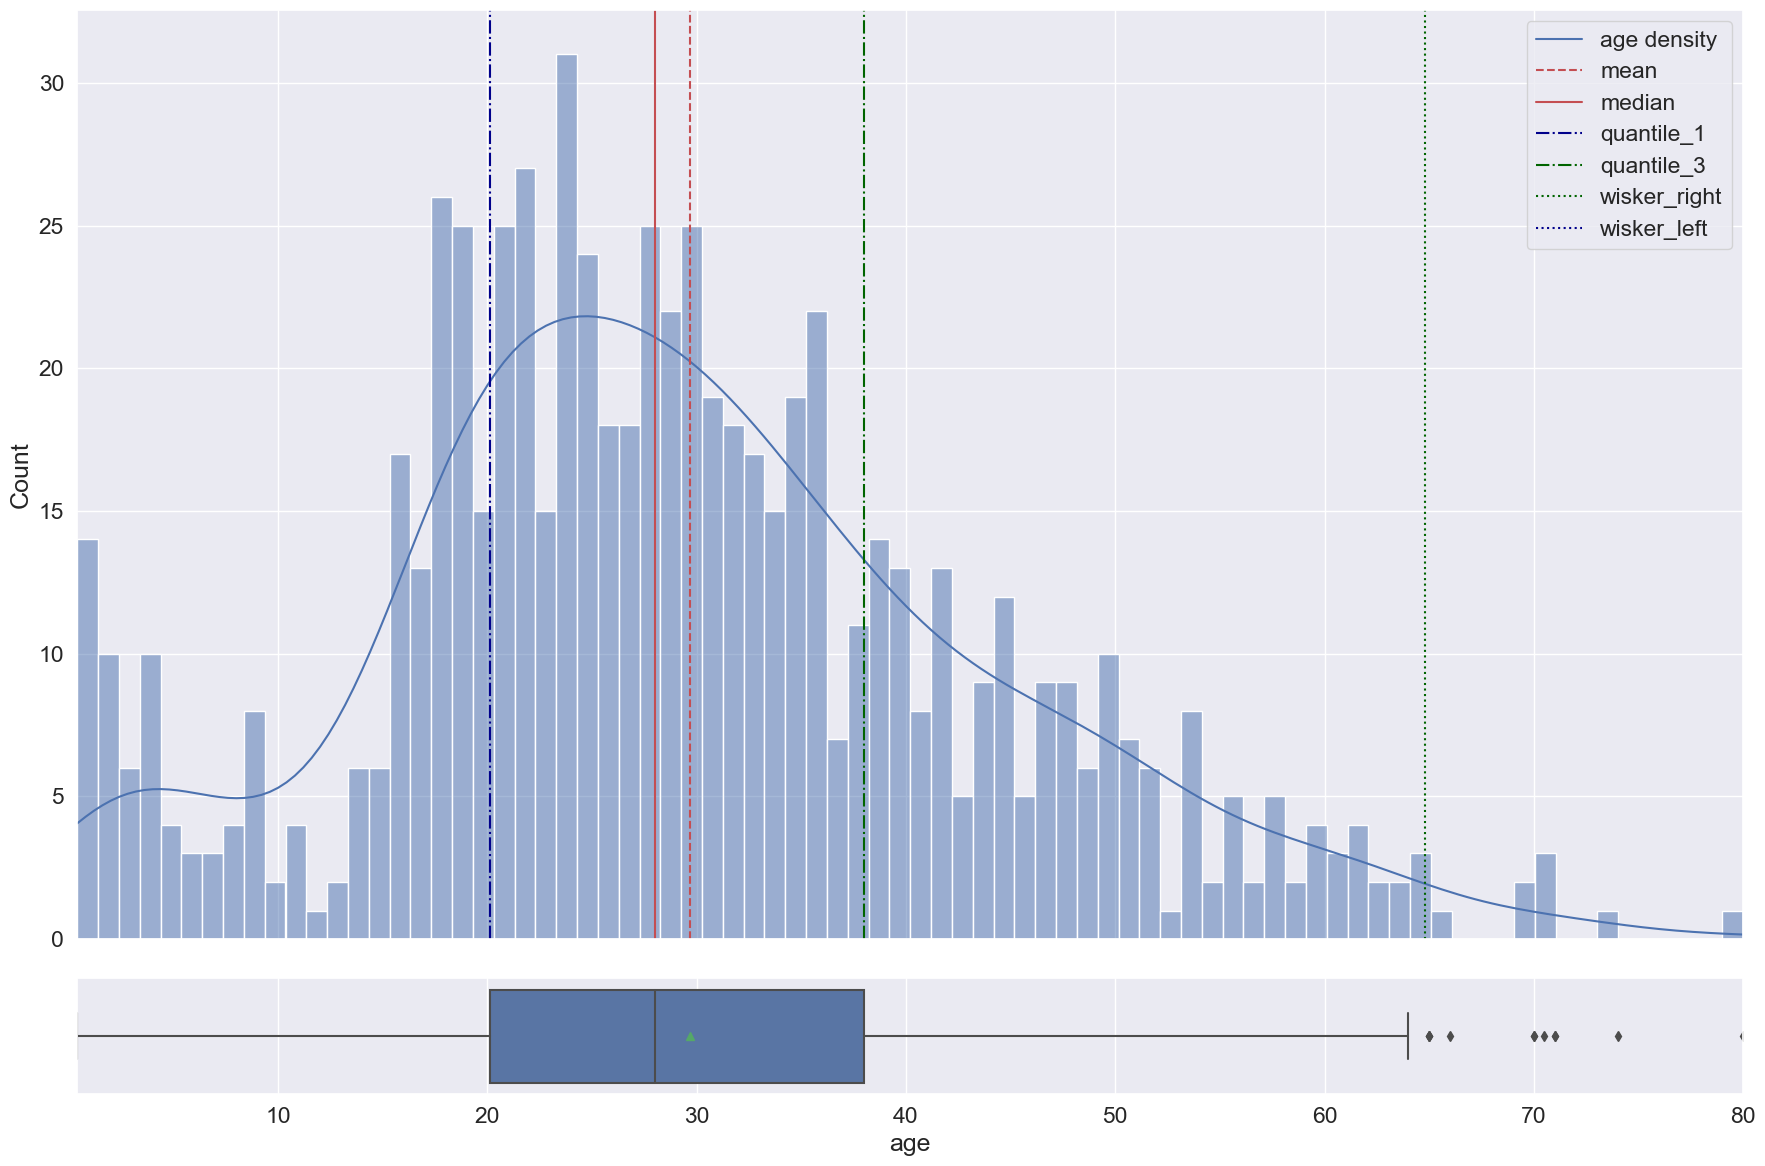

In [7]:
'''
тут сабплот пополняется сразу несколькими новыми аргументами
-- количество "строк" и "столбцов", тоесть сколько графиков будет в высоту и ширину
-- отношение размеров верхнего к нижнему (чтобы один график был больше другого)
-- общая ось x
'''
fig, ax = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [8, 1]}, sharex=True)

plot_data = data['age']
sns.histplot(x=plot_data, kde=True, ax = ax[0], bins=80)
sns.boxplot(x=plot_data, showmeans=True) # по умолчанию на боксплоте отмечена только медиана, но можно добавить и среднее

# если напишем как в прошлой ячейке plt.axvline(), линии появятся на последнем
# отрисованном графике, тоесть на боксплоте, а нужны они на гистограмме. Поэтому ax[0].
ax[0].axvline(mean, ls='--', c='r')
ax[0].axvline(median, c='r')
ax[0].axvline(quantile_1, ls='-.', c='darkblue')
ax[0].axvline(quantile_3, ls='-.', c='darkgreen')
ax[0].axvline(wisker_right, ls=':', c='darkgreen')
ax[0].axvline(wisker_left, ls=':', c='darkblue')

ax[0].legend(['age density', 'mean', 'median',
                                   'quantile_1', 'quantile_3',
                                   'wisker_right', 'wisker_left'])

plt.xlim([plot_data.min(), plot_data.max()])  # ограничим ширину оси Х
plt.tight_layout()  # а это чтобы два графика теснее жались друг к другу :)
plt.show()

Ну вот, учёту на Титанике покорны все возрасты от 0 до 80 лет.    

Конечно, если график нужен один - этого достаточно (впрочем, его надо озаглавить). Но если однотипных графиков надо нарисовать много, лучше упаковать их отрисовку в функцию.   

Далее составим гибкую функцию с помощью которой можно будет рисовать гистограммы, но не строго одинаковые а такие как захочется. И пусть не пугает простыня кода - это всё что было выше, с небольшими дополнениями.   

*Боксплот в паре с графиком распределения это, конечно, избыточное решение, они в некоторой степени дублируют друг друга. Но ради искусства - оставим его в функции.*

In [8]:
def hist(column, data=data, show_vlines=True, stat_legend=True, title=None, **args):
    '''
    Функция может обладать как обязательными аргументами (для удобства мы сделаем такой только один),
    так и необязательными, и даже мы можем добавлять новые аргументы уже при вызове.
    В нашей функции аргументы такие:    
    -- cloumn (обязательный при вызове) - колонка, по которой рисуем гистограмму    
    -- data (необязательный) - собственно, таблица. И если в проекте одна главная таблица,
    можно её сразу прописать, когда задаёшь функцию.    
    -- show_vlines (необязательный) - можно отключить среднее, медиану и пр.,
    но по умолчанию они у нас True, тоесть уже включены.
    -- stat_legend (необязательный) - легенду с пояснением статистик можно отключить
    -- title (необязательный) - но ни одна на свете функция самостоятельно
    не угадает, как ты хочешь назвать график ;)
    -- **args (вообще необязательный) - а благодаря этому ты сможешь добавлять
    ещё какие-нибудь аргументы к гистограмме.        
    '''
    
    '''задаём саб-плот и заголовок'''
    fig, ax = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [8, 1]}, sharex=True)
    fig.suptitle(title)
    
    '''короткая но главная часть: данные, гистограмма и боксплот'''
    plot_data = data[column]
    sns.histplot(x=plot_data, ax = ax[0], kde=True, **args)
    sns.boxplot(x=plot_data, showmeans=True)
    
    '''рассчёт стат. разметки нужен только если он включен в аргументах при вызове функции,
    а если не включён - зачем тратить драгоценные милисекунды на ненужные рассчёты :)'''
    if show_vlines == True:    
        mean = data[column].mean()
        median = data[column].median()
        quantile_1 = data[column].quantile(.25)
        quantile_3 = data[column].quantile(.75)
        
        '''эта часть не только задаёт 1.5 межквартильного размаха,
        но и выравнивает эти "усы" по минимальным и максимальным значениям
        (в нашем случае с возрастом пассажиров это касается только минимума, но если бы не
         было выбросов "справа" - касалось бы и максимумов)'''
        wisker_right = quantile_3 + (quantile_3 - quantile_1) * 1.5
        if wisker_right > plot_data.max():
            wisker_right = plot_data.max()
        wisker_left = quantile_1 - (quantile_3 - quantile_1) * 1.5
        if wisker_left < plot_data.min():
            wisker_left = plot_data.min()
            
        '''нанесение линий'''
        ax[0].axvline(mean, ls='--', c='r')
        ax[0].axvline(median, c='r')
        ax[0].axvline(quantile_1, ls='-.', c='darkblue')
        ax[0].axvline(quantile_3, ls='-.', c='darkgreen')
        ax[0].axvline(wisker_right, ls=':', c='darkgreen')
        ax[0].axvline(wisker_left, ls=':', c='darkblue')
        
        '''сделаем так, чтобы в легенде ещё были показаны координаты линий по оси x'''
        if stat_legend == True:
            legend_text = [column + ' density',
                           'mean:  ' + str(round(mean, 1)),
                           'median:  ' + str(round(median, 1)),
                           'quantile_1:  ' + str(round(quantile_1, 1)),
                           'quantile_3:  ' + str(round(quantile_3, 1)),
                           'wisker_right:  ' + str(round(wisker_right, 1)),
                           'wisker_left:  ' + str(round(wisker_left, 1))]
            ax[0].legend(legend_text, title=column)
        else: pass  # если легенда в аргументах вызова функции отключена - её не будет
    else: pass  # если разметка в аргументах вызова функции отключена - её не будет
    
    '''почти готово'''
    plt.tight_layout()
    plt.show()
    plt.close()

Итак, у функции только один обязательный аргуент. Вот таким будет график, если воспользоваться лишь им.

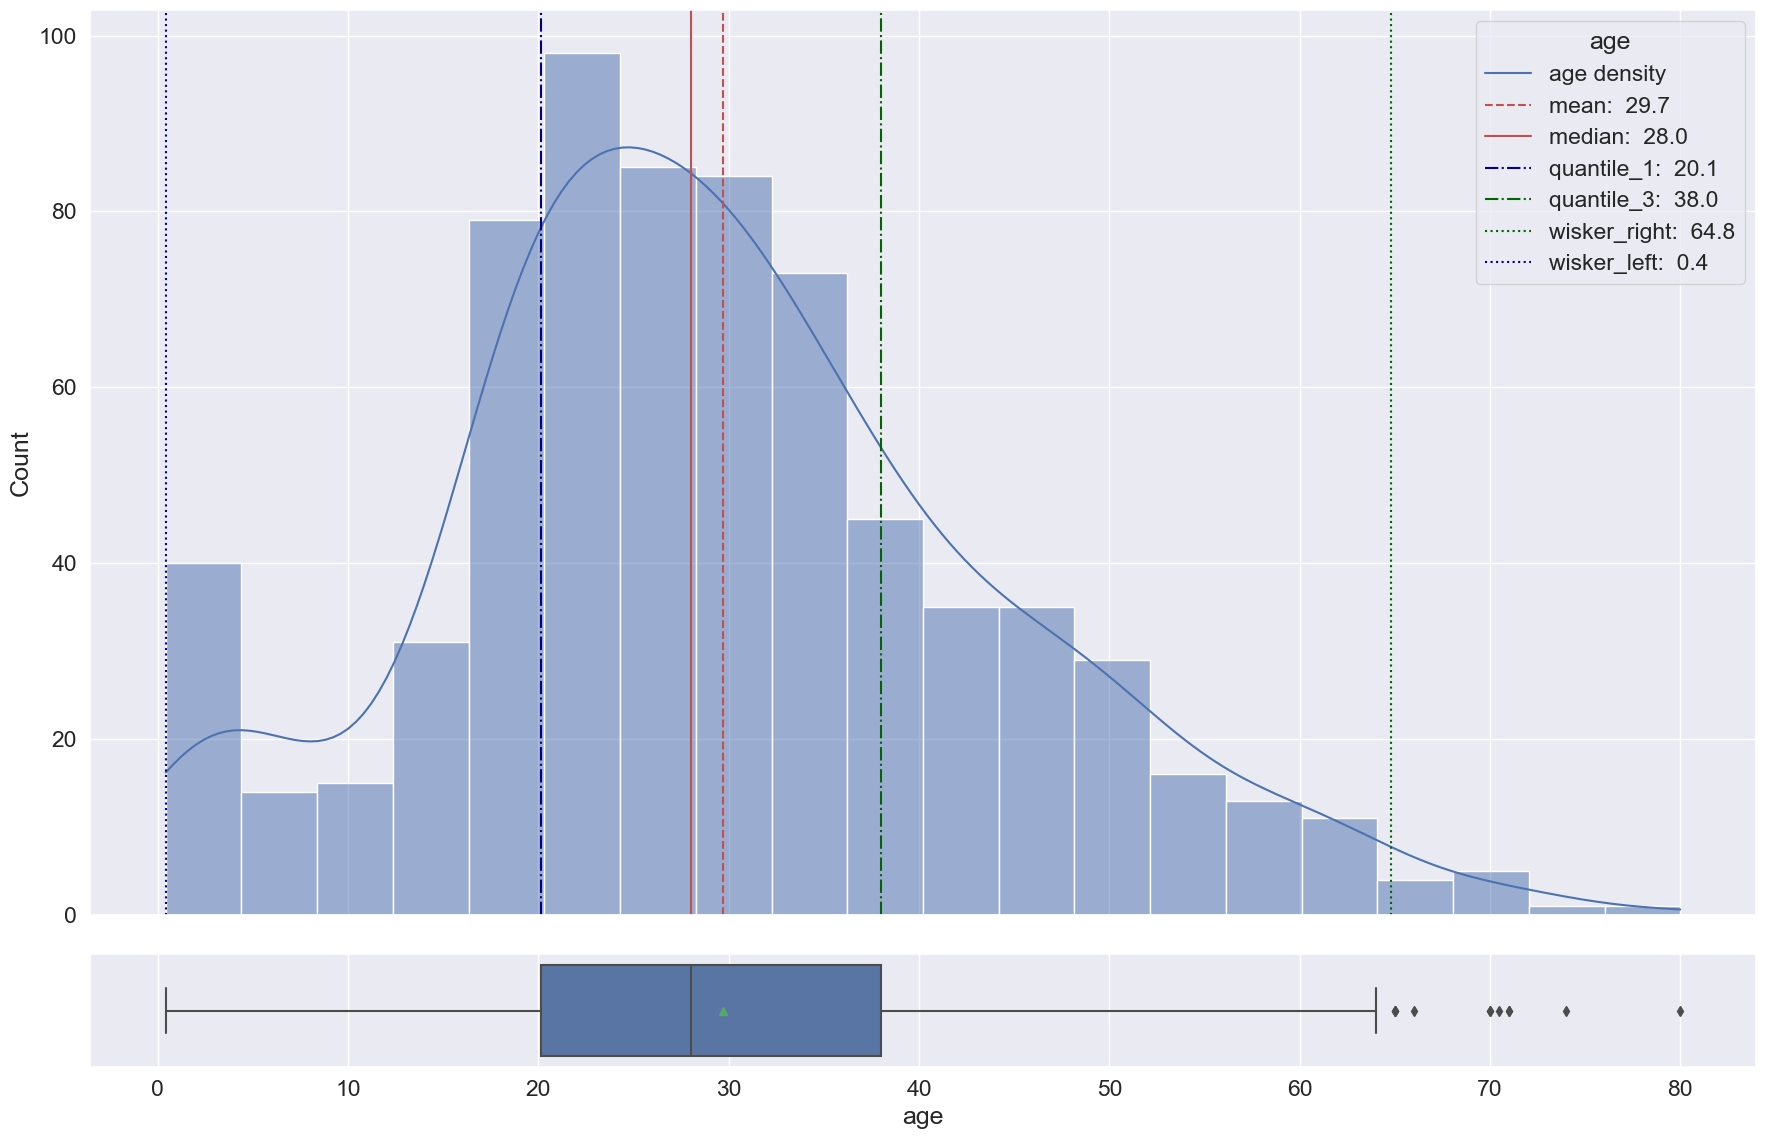

In [9]:
hist('age')

Зададим количество корзин равное количетву наблюдаемых возрастов пассажиров. Обрати внимание, `bins=` нет в аргументах функции. Это как раз и есть `**args` - дополнительные аргументы, которые мы задаём по своему хотению.

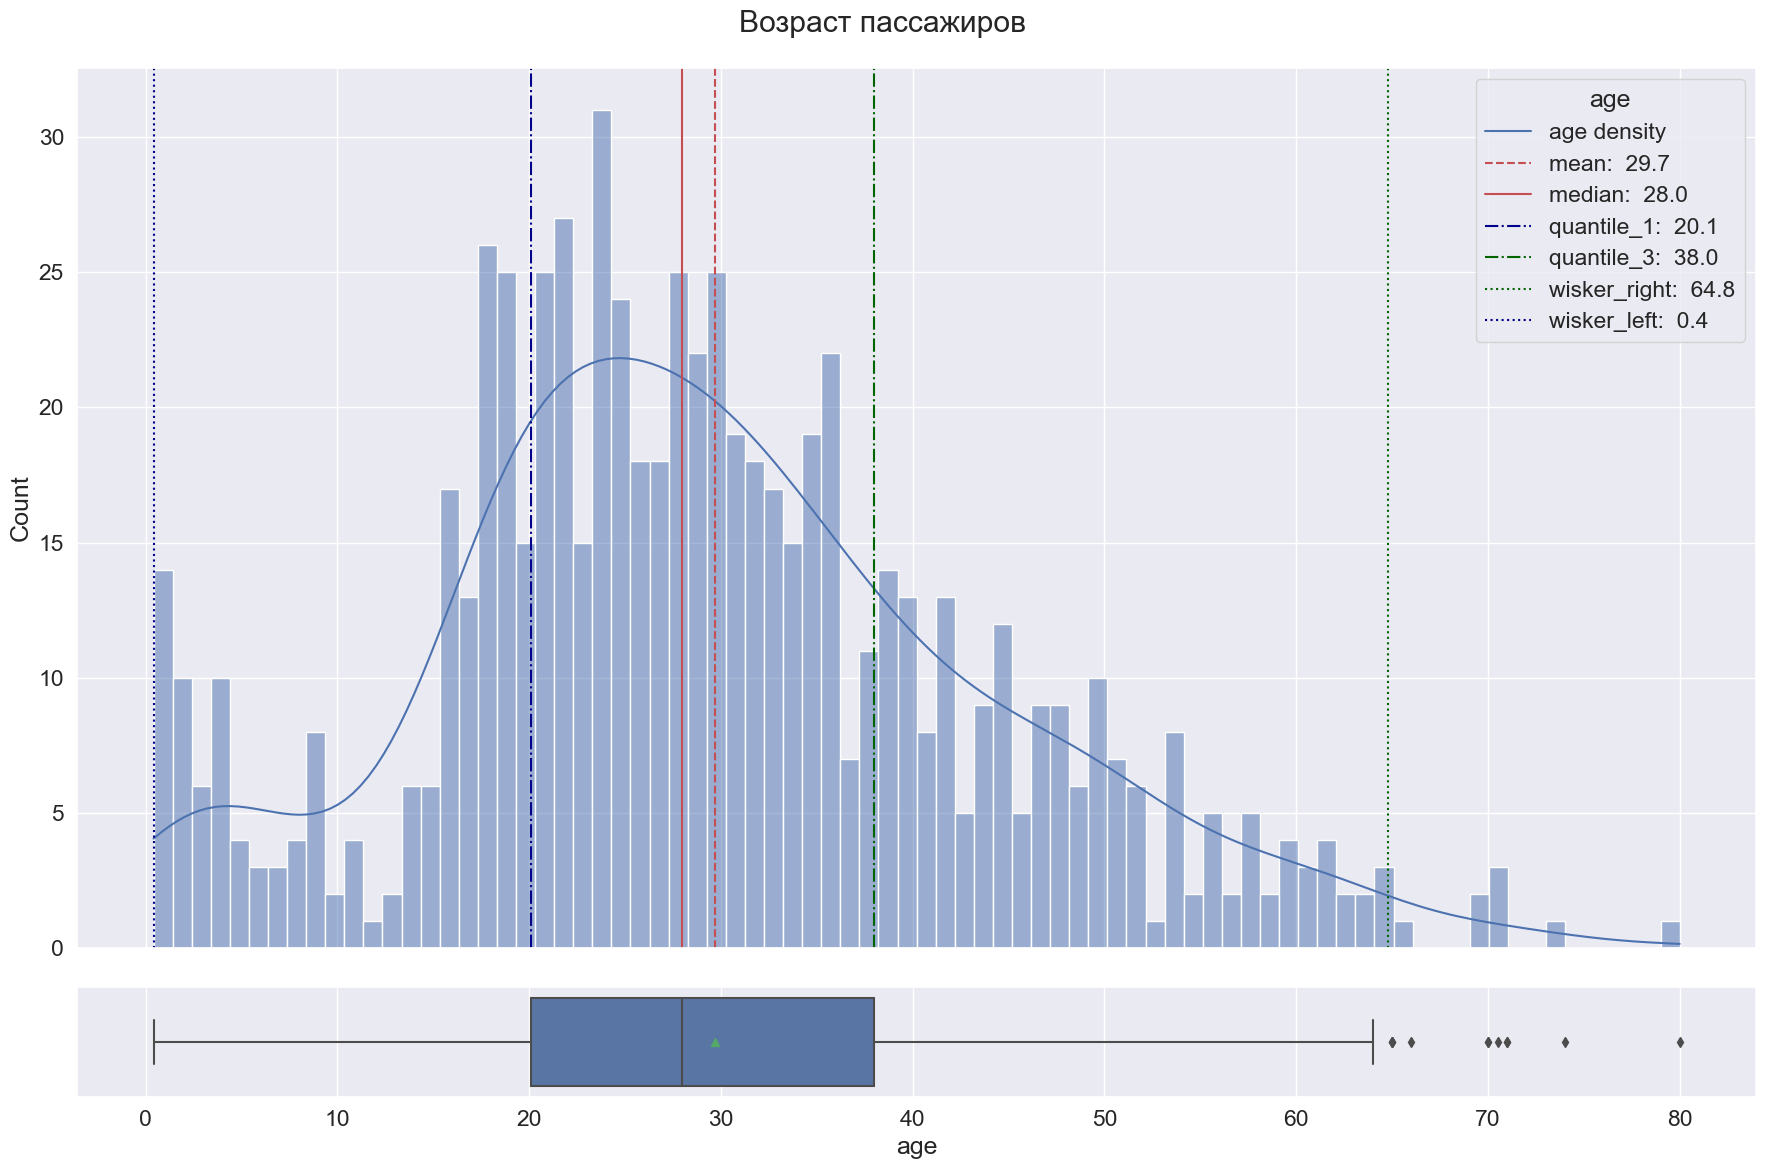

In [10]:
hist('age', bins=80, title='Возраст пассажиров')

Используя эту функцию можно ещё сильней изменить гистограмму, например разделив пассажиров по полу. Для этого в `seaborn`'e есть аргумент `hue`. Однако, легенда в верхнем углу этого не переживёт 😱. На этот случай мы и предусмотрели возможность её отключения (или переключения на стандартную легенду). Также отключим вертикальные линии, чтобы не перегружать график, и добавим ещё немного волшебства 💥

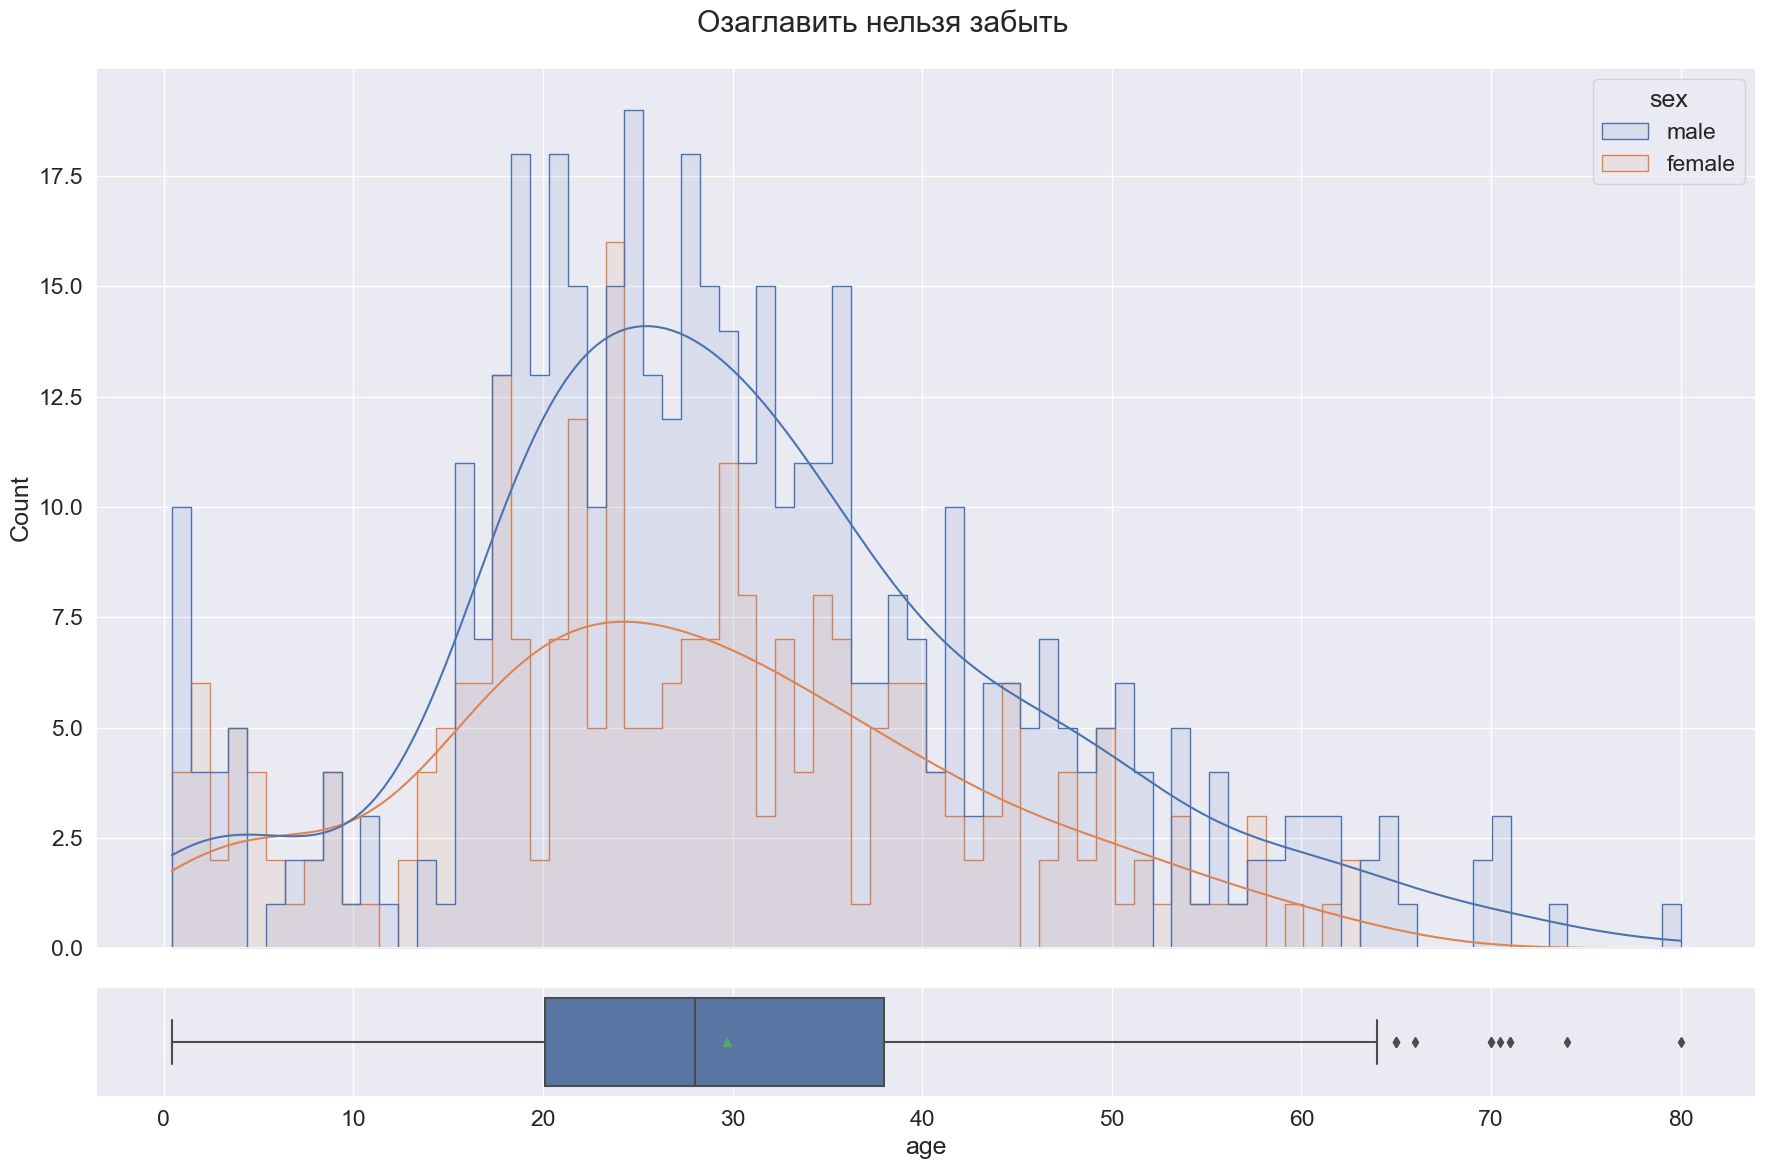

In [11]:
hist('age', bins=80, hue=data['sex'], show_vlines=False,
     stat_legend=False, element='step', alpha=.1, title='Озаглавить нельзя забыть')

Функция одна а графики разные. Конечно, главное не как а что ты отображаешь на графиках. Они должны быть легко читаемы, озаглавлены, оси подписаны, а сами графики должны быть выбраны сообразно цели, а не так как [в этих примерах](http://bintels.com/10-oshibok-v-ispolzovanii-sredstv-grafikov-i-diagramm/).    



Надеюсь материал был полезен   
[Мой телеграм для связи](https://t.me/eilyich "Евгений Прудовский")	